This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Working with Keras: A deep dive

## A spectrum of workflows

## Different ways to build Keras models

### The Sequential model

**The `Sequential` class**

In [2]:
from tensorflow import keras # importing keras from tensorflow package 
from tensorflow.keras import layers # importing layers from keras package

model = keras.Sequential([ # defining the sequential model
    layers.Dense(64, activation="relu"), # adding a dense layer with 64 neurons and relu activation function
    layers.Dense(10, activation="softmax") # adding a dense layer with 10 neurons and softmax activation function
])

**Incrementally building a Sequential model**

In [3]:
model = keras.Sequential() # defining the sequential model
model.add(layers.Dense(64, activation="relu")) # adding a dense layer with 64 neurons and relu activation function
model.add(layers.Dense(10, activation="softmax")) # adding a dense layer with 10 neurons and softmax activation function

**Calling a model for the first time to build it**

In [4]:
model.build(input_shape=(None, 3)) # building the model with input shape of (None, 3) because we have 3 features in the input data 
model.weights # printing the weights of the model

[<KerasVariable shape=(3, 64), dtype=float32, path=sequential_2/dense_4/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=sequential_2/dense_4/bias>,
 <KerasVariable shape=(64, 10), dtype=float32, path=sequential_2/dense_5/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_2/dense_5/bias>]

**The summary method**

In [5]:
model.summary() # printing the summary of the model
# The summary shows the number of parameters in each layer and the total number of parameters in the model
# It also shows the output shape of each layer and the number of neurons in each layer
# The output shape of the first layer is (None, 64) because the first layer has 64 neurons and the input shape is (None, 3)
# The output shape of the second layer is (None, 10) because the second layer has 10 neurons and the input shape is (None, 64) which is the output shape of the first layer

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

**Naming models and layers with the `name` argument**

In [6]:
model = keras.Sequential(name="my_example_model") # defining the sequential model with a name 
model.add(layers.Dense(64, activation="relu", name="my_first_layer")) # adding a dense layer with 64 neurons and relu activation function with a name 
model.add(layers.Dense(10, activation="softmax", name="my_last_layer")) # adding a dense layer with 10 neurons and softmax activation function with a name
model.build((None, 3)) # building the model with input shape of (None, 3) because we have 3 features in the input data
model.summary() # printing the summary of the model
# The summary shows the number of parameters in each layer and the total number of parameters in the model with the names of the layers
# It also shows the output shape of each layer and the number of neurons in each layer

Model: "my_example_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_first_layer (Dense)          │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_last_layer (Dense)           │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

**Specifying the input shape of your model in advance**

In [7]:
model = keras.Sequential() # defining the sequential model
model.add(keras.Input(shape=(3,))) # adding an input layer with input shape of (None, 3) because we have 3 features in the input data
model.add(layers.Dense(64, activation="relu")) # adding a dense layer with 64 neurons and relu activation function

In [8]:
model.summary() # printing the summary of the model
# The summary shows the number of parameters in each layer and the total number of parameters in the model
# It also shows the output shape of each layer and the number of neurons in each layer
# The output shape of the first layer is (None, 64) because the first layer has 64 neurons and the input shape is (None, 3)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.add(layers.Dense(10, activation="softmax")) # adding a dense layer with 10 neurons and softmax activation function 
model.summary() # printing the summary of the model
# The summary shows the number of parameters in each layer and the total number of parameters in the model
# It also shows the output shape of each layer and the number of neurons in each layer
# The output shape of the second layer is (None, 10) because the second layer has 10 neurons and the input shape is (None, 64) which is the output shape of the first layer

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

### The Functional API

#### A simple example

**A simple Functional model with two `Dense` layers**

In [10]:
inputs = keras.Input(shape=(3,), name="my_input") # defining the input layer with input shape of (None, 3) because we have 3 features in the input data
features = layers.Dense(64, activation="relu")(inputs) # adding a dense layer with 64 neurons and relu activation function
outputs = layers.Dense(10, activation="softmax")(features) # adding a dense layer with 10 neurons and softmax activation function
model = keras.Model(inputs=inputs, outputs=outputs) # defining the model with the input and output layers

In [11]:
inputs = keras.Input(shape=(3,), name="my_input") # defining the input layer with input shape of (None, 3) because we have 3 features in the input data

In [12]:
inputs.shape # printing the shape of the input layer
# The shape of the input layer is (None, 3) because we have 3 features in the input data and the batch size is None

(None, 3)

In [13]:
inputs.dtype # printing the data type of the input layer
# The data type of the input layer is float32 by default

'float32'

In [14]:
features = layers.Dense(64, activation="relu")(inputs) # adding a dense layer with 64 neurons and relu activation function

In [15]:
features.shape # printing the shape of the features layer
# The shape of the features layer is (None, 64) because the dense layer has 64 neurons and the input shape is (None, 3)

(None, 64)

In [16]:
outputs = layers.Dense(10, activation="softmax")(features) # adding a dense layer with 10 neurons and softmax activation function
model = keras.Model(inputs=inputs, outputs=outputs) # defining the model with the input and output layers

In [17]:
model.summary() # printing the summary of the model
# The summary shows the number of parameters in each layer and the total number of parameters in the model
# It also shows the output shape of each layer and the number of neurons in each layer
# The output shape of the first layer is (None, 3) because the input shape is (None, 3) and the input layer has 3 features in the input data 
# The output shape of the second layer is (None, 64) because the dense layer has 64 neurons and the input shape is (None, 3) which is the output shape of the input layer
# The output shape of the third layer is (None, 10) because the dense layer has 10 neurons and the input shape is (None, 64) which is the output shape of the dense layer
# The total number of parameters in the model is 650 because the first dense layer has 64 neurons and 64*3=192 parameters and the second dense layer has 10 neurons and 10*64=640 parameters

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Multi-input, multi-output models

**A multi-input, multi-output Functional model**

In [18]:
vocabulary_size = 10000 # defining the vocabulary size 
num_tags = 100 # defining the number of tags
num_departments = 4 # defining the number of departments

title = keras.Input(shape=(vocabulary_size,), name="title") # defining the input layer for the title with input shape of (None, vocabulary_size)
text_body = keras.Input(shape=(vocabulary_size,), name="text_body") # defining the input layer for the text body with input shape of (None, vocabulary_size)
tags = keras.Input(shape=(num_tags,), name="tags") # defining the input layer for the tags with input shape of (None, num_tags)

features = layers.Concatenate()([title, text_body, tags]) # concatenating the input layers because it needs to be combined before passing to the dense layer
features = layers.Dense(64, activation="relu")(features) # adding a dense layer with 64 neurons and relu activation function

priority = layers.Dense(1, activation="sigmoid", name="priority")(features) # adding a dense layer with 1 neuron and sigmoid activation function for the priority
department = layers.Dense( 
    num_departments, activation="softmax", name="department")(features) # adding a dense layer with num_departments neurons and softmax activation function for the department

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department]) # defining the model with the input and output layers

#### Training a multi-input, multi-output model

**Training a model by providing lists of input & target arrays**

In [19]:
import numpy as np # importing numpy package 

num_samples = 1280 # defining the number of samples

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size)) # generating random title data
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size)) # generating random text body data
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags)) # generating random tags data
 
priority_data = np.random.random(size=(num_samples, 1)) # generating random priority data
department_data = np.random.randint(0, 2, size=(num_samples, num_departments)) # generating random department data

model.compile(optimizer="rmsprop", # compiling the model with rmsprop optimizer
              loss=["mean_squared_error", "categorical_crossentropy"], # defining the loss functions for the priority and department
              metrics=[["mean_absolute_error"], ["accuracy"]]) # defining the metrics for the priority and department
model.fit([title_data, text_body_data, tags_data], # training the model with the input and output data
          [priority_data, department_data], epochs=1) # training the model for 1 epoch with the input and output data 
model.evaluate([title_data, text_body_data, tags_data], # evaluating the model with the input and output data
               [priority_data, department_data]) 
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data]) # predicting the priority and department with the input data 

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - department_accuracy: 0.2140 - loss: 42.1553 - priority_mean_absolute_error: 0.4953
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - department_accuracy: 0.2349 - loss: 34.5862 - priority_mean_absolute_error: 0.4964
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


**Training a model by providing dicts of input & target arrays**

In [20]:
model.compile(optimizer="rmsprop", # compiling the model with rmsprop optimizer
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"}, # defining the loss functions for the priority and department
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]}) # defining the metrics for the priority and department
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data}, # training the model with the input and output data
          {"priority": priority_data, "department": department_data}, 
          epochs=1) # training the model for 1 epoch
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data}, # evaluating the model with the input and output data
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict( # predicting the priority and department with the input data
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - department_accuracy: 0.2380 - loss: 42.4500 - priority_mean_absolute_error: 0.5078
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - department_accuracy: 0.5657 - loss: 49.6810 - priority_mean_absolute_error: 0.4964
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


#### The power of the Functional API: Access to layer connectivity

In [21]:
keras.utils.plot_model(model, "ticket_classifier.png") # plotting the model and saving it as ticket_classifier.png

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [22]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True) # plotting the model with shape information and saving it as ticket_classifier_with_shape_info.png

You must install pydot (`pip install pydot`) for `plot_model` to work.


**Retrieving the inputs or outputs of a layer in a Functional model**

In [23]:
model.layers # printing the layers of the model

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Dense name=dense_12, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]

In [24]:
model.layers[3].input # printing the input of the 4th layer

[<KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=title>,
 <KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=text_body>,
 <KerasTensor shape=(None, 100), dtype=float32, sparse=None, name=tags>]

In [25]:
model.layers[3].output # printing the output of the 4th layer

<KerasTensor shape=(None, 20100), dtype=float32, sparse=False, name=keras_tensor_14>

**Creating a new model by reusing intermediate layer outputs**

In [26]:
features = model.layers[4].output # getting the output of the 5th layer
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features) # adding a dense layer with 3 neurons and softmax activation function for the difficulty

new_model = keras.Model( # defining a new model with the input and output layers
    inputs=[title, text_body, tags], # defining the input layers with title, text_body, and tags
    outputs=[priority, department, difficulty]) # defining the output layers with priority, department, and difficulty

In [27]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True) # plotting the updated model with shape information and saving it as updated_ticket_classifier.png

You must install pydot (`pip install pydot`) for `plot_model` to work.


### Subclassing the Model class

#### Rewriting our previous example as a subclassed model

**A simple subclassed model**

In [28]:
class CustomerTicketModel(keras.Model): # defining a custom model class

    def __init__(self, num_departments): # defining the constructor with the number of departments as input 
        super().__init__() # calling the constructor of the parent class
        self.concat_layer = layers.Concatenate() # concatenating the input layers
        self.mixing_layer = layers.Dense(64, activation="relu") # adding a dense layer with 64 neurons and relu activation function
        self.priority_scorer = layers.Dense(1, activation="sigmoid") # adding a dense layer with 1 neuron and sigmoid activation function for the priority
        self.department_classifier = layers.Dense( # adding a dense layer for the department
            num_departments, activation="softmax") # with num_departments neurons and softmax activation function

    def call(self, inputs): # defining the call method with inputs as input
        title = inputs["title"] # getting the title from the inputs
        text_body = inputs["text_body"] # getting the text body from the inputs
        tags = inputs["tags"] # getting the tags from the inputs

        features = self.concat_layer([title, text_body, tags]) # concatenating the input layers
        features = self.mixing_layer(features) # passing the concatenated features to the mixing layer
        priority = self.priority_scorer(features) # passing the mixed features to the priority scorer
        department = self.department_classifier(features) # passing the mixed features to the department classifier
        return priority, department # returning the priority and department

In [29]:
model = CustomerTicketModel(num_departments=4) # creating an instance of the custom model class with 4 departments

priority, department = model( # calling the model with the input data
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [30]:
model.compile(optimizer="rmsprop", # compiling the model with rmsprop optimizer
              loss=["mean_squared_error", "categorical_crossentropy"], # defining the loss functions for the priority and department
              metrics=[["mean_absolute_error"], ["accuracy"]]) # defining the metrics for the priority and department
model.fit({"title": title_data, # training the model with the input and output data
           "text_body": text_body_data, 
           "tags": tags_data},
          [priority_data, department_data], 
          epochs=1) # training the model for 1 epoch
model.evaluate({"title": title_data, # evaluating the model with the input and output data
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data]) 
priority_preds, department_preds = model.predict({"title": title_data, # predicting the priority and department with the input data
                                                  "text_body": text_body_data, 
                                                  "tags": tags_data}) 

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1697 - loss: 50.1776 - mean_absolute_error: 0.4810
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2349 - loss: 24.3458 - mean_absolute_error: 0.5036
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


#### Beware: What subclassed models don't support

### Mixing and matching different components

**Creating a Functional model that includes a subclassed model**

In [31]:
class Classifier(keras.Model): # defining a custom model class

    def __init__(self, num_classes=2): # defining the constructor with the number of classes as input
        super().__init__() # calling the constructor of the parent class
        if num_classes == 2: # if the number of classes is 2
            num_units = 1 # set the number of units to 1
            activation = "sigmoid" # set the activation function to sigmoid
        else: # if the number of classes is not 2
            num_units = num_classes # set the number of units to the number of classes
            activation = "softmax" # set the activation function to softmax
        self.dense = layers.Dense(num_units, activation=activation) # adding a dense layer with num_units neurons and the specified activation function

    def call(self, inputs): # defining the call method with inputs as input
        return self.dense(inputs) # returning the output of the dense layer
 
inputs = keras.Input(shape=(3,)) # defining the input layer with input shape of (None, 3) because we have 3 features in the input data
features = layers.Dense(64, activation="relu")(inputs) # adding a dense layer with 64 neurons and relu activation function
outputs = Classifier(num_classes=10)(features) # adding a custom classifier with 10 classes
model = keras.Model(inputs=inputs, outputs=outputs) # defining the model with the input and output layers

**Creating a subclassed model that includes a Functional model**

In [32]:
inputs = keras.Input(shape=(64,)) # defining the input layer with input shape of (None, 64) because the output shape of the dense layer is (None, 64)
outputs = layers.Dense(1, activation="sigmoid")(inputs) # adding a dense layer with 1 neuron and sigmoid activation function
binary_classifier = keras.Model(inputs=inputs, outputs=outputs) # defining a binary classifier model with the input and output layers

class MyModel(keras.Model): # defining a custom model class

    def __init__(self, num_classes=2): # defining the constructor with the number of classes as input
        super().__init__() # calling the constructor of the parent class
        self.dense = layers.Dense(64, activation="relu") # adding a dense layer with 64 neurons and relu activation function
        self.classifier = binary_classifier # adding a binary classifier

    def call(self, inputs): # defining the call method with inputs as input
        features = self.dense(inputs) # passing the inputs to the dense layer
        return self.classifier(features) # passing the features to the binary classifier

model = MyModel() # creating an instance of the custom model class

### Remember: Use the right tool for the job

## Using built-in training and evaluation loops

**The standard workflow: `compile()`, `fit()`, `evaluate()`, `predict()`**

In [33]:
from tensorflow.keras.datasets import mnist # importing mnist dataset

def get_mnist_model(): # defining a function to get the mnist model
    inputs = keras.Input(shape=(28 * 28,)) # defining the input layer with input shape of (None, 28*28) because the input data has 28*28 features
    features = layers.Dense(512, activation="relu")(inputs) # adding a dense layer with 512 neurons and relu activation function
    features = layers.Dropout(0.5)(features) # adding a dropout layer with a dropout rate of 0.5 (the most common rate)
    outputs = layers.Dense(10, activation="softmax")(features) # adding a dense layer with 10 neurons and softmax activation function
    model = keras.Model(inputs, outputs) # defining the model with the input and output layers
    return model # returning the model

(images, labels), (test_images, test_labels) = mnist.load_data() # loading the mnist dataset
images = images.reshape((60000, 28 * 28)).astype("float32") / 255 # reshaping the images and normalizing them
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255 # reshaping the test images and normalizing them
train_images, val_images = images[10000:], images[:10000] # splitting the images into training and validation sets
train_labels, val_labels = labels[10000:], labels[:10000] # splitting the labels into training and validation sets

model = get_mnist_model() # getting the mnist model
model.compile(optimizer="rmsprop", # compiling the model with rmsprop optimizer
              loss="sparse_categorical_crossentropy", # defining the loss function
              metrics=["accuracy"]) # defining the metrics
model.fit(train_images, train_labels, # training the model with the training data
          epochs=3, # training the model for 3 epochs
          validation_data=(val_images, val_labels)) # validating the model with the validation data
test_metrics = model.evaluate(test_images, test_labels) # evaluating the model with the test data
predictions = model.predict(test_images) # predicting the test data

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8673 - loss: 0.4428 - val_accuracy: 0.9578 - val_loss: 0.1454
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9510 - loss: 0.1706 - val_accuracy: 0.9689 - val_loss: 0.1075
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9652 - loss: 0.1257 - val_accuracy: 0.9744 - val_loss: 0.0962
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.9696 - loss: 0.1052
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step


### Writing your own metrics

**Implementing a custom metric by subclassing the `Metric` class**

In [34]:
import tensorflow as tf # importing tensorflow package

class RootMeanSquaredError(keras.metrics.Metric): # defining a custom metric class

    def __init__(self, name="rmse", **kwargs): # defining the constructor with the name and keyword arguments
        super().__init__(name=name, **kwargs) # calling the constructor of the parent class
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros") # adding a weight for the mse sum
        self.total_samples = self.add_weight( # adding a weight for the total number of samples
            name="total_samples", initializer="zeros", dtype="int32") # with dtype int32 for integer values 

    def update_state(self, y_true, y_pred, sample_weight=None): # defining the update state method with y_true, y_pred, and sample_weight as inputs
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1]) # converting the true labels to one-hot encoding
        mse = tf.reduce_sum(tf.square(y_true - y_pred)) # calculating the mean squared error
        self.mse_sum.assign_add(mse) # adding the mse to the mse sum
        num_samples = tf.shape(y_pred)[0] # getting the number of samples
        self.total_samples.assign_add(num_samples) # adding the number of samples to the total samples

    def result(self): # defining the result method
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32)) # returning the root mean squared error

    def reset_state(self): # defining the reset state method
        self.mse_sum.assign(0.) # assigning 0 to the mse sum
        self.total_samples.assign(0) # assigning 0 to the total samples

In [35]:
model = get_mnist_model() # getting the mnist model
model.compile(optimizer="rmsprop", # compiling the model with rmsprop optimizer
              loss="sparse_categorical_crossentropy", # defining the loss function
              metrics=["accuracy", RootMeanSquaredError()]) # defining the metrics with accuracy and the custom metric
model.fit(train_images, train_labels, # training the model with the training data
          epochs=3, # training the model for 3 epochs
          validation_data=(val_images, val_labels)) # validating the model with the validation data
test_metrics = model.evaluate(test_images, test_labels) # evaluating the model with the test data

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8630 - loss: 0.4512 - rmse: 0.4404 - val_accuracy: 0.9582 - val_loss: 0.1434 - val_rmse: 0.2507
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9497 - loss: 0.1708 - rmse: 0.2746 - val_accuracy: 0.9659 - val_loss: 0.1166 - val_rmse: 0.2245
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9614 - loss: 0.1328 - rmse: 0.2421 - val_accuracy: 0.9720 - val_loss: 0.1035 - val_rmse: 0.2076
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.9695 - loss: 0.1035 - rmse: 0.2133


### Using callbacks

#### The EarlyStopping and ModelCheckpoint callbacks

**Using the `callbacks` argument in the `fit()` method**

In [36]:
callbacks_list = [ # defining a list of callbacks
    keras.callbacks.EarlyStopping( # adding an early stopping callback
        monitor="val_accuracy", # monitoring the validation accuracy
        patience=2, # waiting for 2 epochs without improvement
    ),
    keras.callbacks.ModelCheckpoint( # adding a model checkpoint callback
        filepath="checkpoint_path.keras", # saving the model to the specified path
        monitor="val_loss", # monitoring the validation loss
        save_best_only=True, # saving only the best model
    )
]
model = get_mnist_model() # getting the mnist model
model.compile(optimizer="rmsprop", # compiling the model with rmsprop optimizer
              loss="sparse_categorical_crossentropy", # defining the loss function
              metrics=["accuracy"]) # defining the metrics
model.fit(train_images, train_labels, # training the model with the training data
          epochs=10, # training the model for 10 epochs
          callbacks=callbacks_list, # using the callbacks list
          validation_data=(val_images, val_labels)) # validating the model with the validation data

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8650 - loss: 0.4452 - val_accuracy: 0.9575 - val_loss: 0.1432
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9525 - loss: 0.1660 - val_accuracy: 0.9666 - val_loss: 0.1160
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9617 - loss: 0.1338 - val_accuracy: 0.9728 - val_loss: 0.1023
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9674 - loss: 0.1173 - val_accuracy: 0.9753 - val_loss: 0.0983
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9729 - loss: 0.1011 - val_accuracy: 0.9761 - val_loss: 0.0910
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9757 - loss: 0.0895 - val_accuracy: 0.9779 - val_loss: 0.0927
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9758 - loss: 0.0887 - val_accuracy: 0.9794 - val_loss: 0.0837
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9794 - loss: 0.0797 - 

In [37]:
model = keras.models.load_model("checkpoint_path.keras") # loading the best model from the checkpoint path

### Writing your own callbacks

**Creating a custom callback by subclassing the `Callback` class**

In [38]:
from matplotlib import pyplot as plt # importing pyplot from matplotlib package

class LossHistory(keras.callbacks.Callback): # defining a custom callback class
    def on_train_begin(self, logs): # defining the on train begin method with logs as input
        self.per_batch_losses = [] # initializing the list of per batch losses

    def on_batch_end(self, batch, logs): # defining the on batch end method with batch and logs as inputs
        self.per_batch_losses.append(logs.get("loss")) # appending the loss to the list of per batch losses

    def on_epoch_end(self, epoch, logs): # defining the on epoch end method with epoch and logs as inputs
        plt.clf() # clearing the current figure
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses, # plotting the per batch losses for the epoch 
                 label="Training loss for each batch") # adding a label for the plot
        plt.xlabel(f"Batch (epoch {epoch})") # setting the x-axis label
        plt.ylabel("Loss") # setting the y-axis label
        plt.legend() # adding a legend to the plot
        plt.savefig(f"plot_at_epoch_{epoch}") # saving the plot as a file
        self.per_batch_losses = [] # resetting the list of per batch losses

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8633 - loss: 0.4522 - val_accuracy: 0.9597 - val_loss: 0.1458
Epoch 2/10
  44/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9597 - loss: 0.1452

/var/folders/5j/v9msxv8n6jv_3409lgk47xph0000gn/T/ipykernel_69949/3405740079.py:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"plot_at_epoch_{epoch}")
/var/folders/5j/v9msxv8n6jv_3409lgk47xph0000gn/T/ipykernel_69949/3405740079.py:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"plot_at_epoch_{epoch}")
/var/folders/5j/v9msxv8n6jv_3409lgk47xph0000gn/T/ipykernel_69949/3405740079.py:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"plot_at_epoch_{epoch}")
/var/folders/5j/v9msxv8n6jv_3409lgk47xph0000gn/T/ipykernel_69949/3405740079.py:17: MatplotlibDeprecationWarnin

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9532 - loss: 0.1624 - val_accuracy: 0.9689 - val_loss: 0.1131
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9614 - loss: 0.1328 - val_accuracy: 0.9695 - val_loss: 0.1142
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9690 - loss: 0.1102 - val_accuracy: 0.9731 - val_loss: 0.0986
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9718 - loss: 0.1005 - val_accuracy: 0.9750 - val_loss: 0.0942
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9741 - loss: 0.0937 - val_accuracy: 0.9781 - val_loss: 0.0888
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9763 - loss: 0.0854 - val_accuracy: 0.9757 - val_loss: 0.0981
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9761 - loss: 0.0835 - val_accuracy: 0.9775 - val_loss: 0.0917
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9799 - loss: 0.0716 - val_accurac

/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/

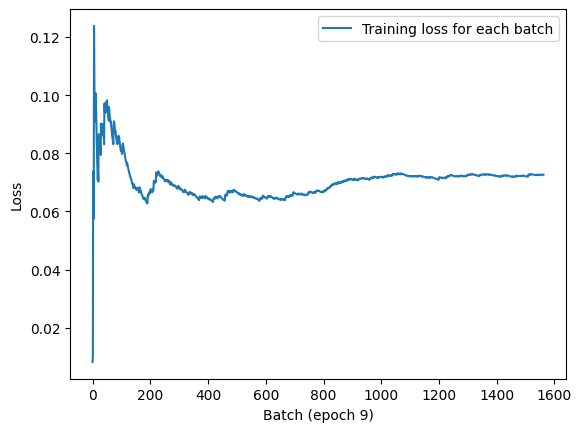

In [39]:
model = get_mnist_model() # getting the mnist model
model.compile(optimizer="rmsprop", # compiling the model with rmsprop optimizer
              loss="sparse_categorical_crossentropy", # defining the loss function
              metrics=["accuracy"]) # defining the metrics
model.fit(train_images, train_labels, # training the model with the training data
          epochs=10, # training the model for 10 epochs
          callbacks=[LossHistory()], # using the custom callback
          validation_data=(val_images, val_labels)) # validating the model with the validation data

### Monitoring and visualization with TensorBoard

In [40]:
model = get_mnist_model() # getting the mnist model
model.compile(optimizer="rmsprop", # compiling the model with rmsprop optimizer
              loss="sparse_categorical_crossentropy", # defining the loss function
              metrics=["accuracy"]) # defining the metrics

tensorboard = keras.callbacks.TensorBoard( # defining a tensorboard callback
    log_dir="/full_path_to_your_log_dir", # specifying the log directory
)
model.fit(train_images, train_labels, # training the model with the training data
          epochs=10, # training the model for 10 epochs
          validation_data=(val_images, val_labels), # validating the model with the validation data
          callbacks=[tensorboard]) # using the tensorboard callback

2024-04-02 14:39:50.370004: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at summary_kernels.cc:65 : PERMISSION_DENIED: /full_path_to_your_log_dir; Read-only file system
2024-04-02 14:39:50.370020: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: PERMISSION_DENIED: /full_path_to_your_log_dir; Read-only file system


PermissionDeniedError: {{function_node __wrapped__CreateSummaryFileWriter_device_/job:localhost/replica:0/task:0/device:CPU:0}} /full_path_to_your_log_dir; Read-only file system [Op:CreateSummaryFileWriter] name: 

In [ ]:
%load_ext tensorboard # loading the tensorboard extension
%tensorboard --logdir /full_path_to_your_log_dir # running the tensorboard with the specified log directory

## Writing your own training and evaluation loops

### Training versus inference

### Low-level usage of metrics

In [ ]:
metric = keras.metrics.SparseCategoricalAccuracy() # defining a sparse categorical accuracy metric
targets = [0, 1, 2] # defining the target labels
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]] # defining the predicted labels
metric.update_state(targets, predictions) # updating the metric with the targets and predictions
current_result = metric.result() # getting the current result of the metric
print(f"result: {current_result:.2f}") # printing the current result of the metric

In [ ]:
values = [0, 1, 2, 3, 4] # defining a list of values
mean_tracker = keras.metrics.Mean() # defining a mean metric
for value in values: # iterating over the values
    mean_tracker.update_state(value) # updating the mean metric with the value
print(f"Mean of values: {mean_tracker.result():.2f}") # printing the mean of the values

### A complete training and evaluation loop

**Writing a step-by-step training loop: the training step function**

In [ ]:
model = get_mnist_model() # getting the mnist model

loss_fn = keras.losses.SparseCategoricalCrossentropy() # defining a sparse categorical crossentropy loss function
optimizer = keras.optimizers.RMSprop() # defining an RMSprop optimizer
metrics = [keras.metrics.SparseCategoricalAccuracy()] # defining a sparse categorical accuracy metric
loss_tracking_metric = keras.metrics.Mean() # defining a mean metric for tracking the loss

def train_step(inputs, targets): # defining a training step function with inputs and targets as inputs
    with tf.GradientTape() as tape: # using a gradient tape to record the operations
        predictions = model(inputs, training=True) # getting the predictions from the model
        loss = loss_fn(targets, predictions) # calculating the loss
    gradients = tape.gradient(loss, model.trainable_weights) # calculating the gradients
    optimizer.apply_gradients(zip(gradients, model.trainable_weights)) # applying the gradients

    logs = {} # initializing a dictionary for logs
    for metric in metrics: # iterating over the metrics
        metric.update_state(targets, predictions) # updating the metric with the targets and predictions
        logs[metric.name] = metric.result() # adding the metric result to the logs

    loss_tracking_metric.update_state(loss) # updating the loss tracking metric with the loss
    logs["loss"] = loss_tracking_metric.result() # adding the loss to the logs
    return logs # returning the logs

**Writing a step-by-step training loop: resetting the metrics**

In [ ]:
def reset_metrics(): # defining a function to reset the metrics
    for metric in metrics: # iterating over the metrics
        metric.reset_state() # resetting the state of the metric
    loss_tracking_metric.reset_state() # resetting the state of the loss tracking metric

**Writing a step-by-step training loop: the loop itself**

In [ ]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)) # creating a training dataset
training_dataset = training_dataset.batch(32) # batching the training dataset into batches of size 32 because it is a common batch size for training 
epochs = 3 # defining the number of epochs
for epoch in range(epochs): # iterating over the epochs
    reset_metrics() # resetting the metrics
    for inputs_batch, targets_batch in training_dataset: # iterating over the training dataset
        logs = train_step(inputs_batch, targets_batch) # performing a training step
    print(f"Results at the end of epoch {epoch}") # printing the results at the end of the epoch
    for key, value in logs.items(): # iterating over the logs
        print(f"...{key}: {value:.4f}") # printing the key and value

**Writing a step-by-step evaluation loop**

In [ ]:
def test_step(inputs, targets): # defining a test step function with inputs and targets as inputs
    predictions = model(inputs, training=False) # getting the predictions from the model
    loss = loss_fn(targets, predictions) # calculating the loss

    logs = {} # initializing a dictionary for logs
    for metric in metrics: # iterating over the metrics
        metric.update_state(targets, predictions) # updating the metric with the targets and predictions
        logs["val_" + metric.name] = metric.result() # adding the metric result to the logs

    loss_tracking_metric.update_state(loss) # updating the loss tracking metric with the loss
    logs["val_loss"] = loss_tracking_metric.result() # adding the loss to the logs
    return logs # returning the logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels)) # creating a validation dataset
val_dataset = val_dataset.batch(32) # batching the validation dataset into batches of size 32 because it is a common batch size for validation
reset_metrics() # resetting the metrics
for inputs_batch, targets_batch in val_dataset: # iterating over the validation dataset
    logs = test_step(inputs_batch, targets_batch) # performing a test step
print("Evaluation results:") # printing the evaluation results
for key, value in logs.items(): # iterating over the logs
    print(f"...{key}: {value:.4f}") # printing the key and value

### Make it fast with tf.function

**Adding a `tf.function` decorator to our evaluation-step function**

In [ ]:
@tf.function # defining a TensorFlow function for the training step
def test_step(inputs, targets): # defining a test step function with inputs and targets as inputs
    predictions = model(inputs, training=False) # getting the predictions from the model
    loss = loss_fn(targets, predictions) # calculating the loss

    logs = {} # initializing a dictionary for logs
    for metric in metrics: # iterating over the metrics
        metric.update_state(targets, predictions) # updating the metric with the targets and predictions
        logs["val_" + metric.name] = metric.result() # adding the metric result to the logs

    loss_tracking_metric.update_state(loss) # updating the loss tracking metric with the loss
    logs["val_loss"] = loss_tracking_metric.result() # adding the loss to the logs
    return logs # returning the logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels)) # creating a validation dataset
val_dataset = val_dataset.batch(32) # batching the validation dataset into batches of size 32 because it is a common batch size for validation
reset_metrics() # resetting the metrics
for inputs_batch, targets_batch in val_dataset: # iterating over the validation dataset
    logs = test_step(inputs_batch, targets_batch) # performing a test step
print("Evaluation results:") # printing the evaluation results
for key, value in logs.items(): # iterating over the logs
    print(f"...{key}: {value:.4f}") # printing the key and value

### Leveraging fit() with a custom training loop

**Implementing a custom training step to use with `fit()`**

In [ ]:
loss_fn = keras.losses.SparseCategoricalCrossentropy() # defining a sparse categorical crossentropy loss function
loss_tracker = keras.metrics.Mean(name="loss") # defining a mean metric for tracking the loss

class CustomModel(keras.Model): # defining a custom model class
    def train_step(self, data): # defining a train step method with data as input
        inputs, targets = data # getting the inputs and targets from the data
        with tf.GradientTape() as tape: # using a gradient tape to record the operations
            predictions = self(inputs, training=True) # getting the predictions from the model
            loss = loss_fn(targets, predictions) # calculating the loss
        gradients = tape.gradient(loss, self.trainable_weights) # calculating the gradients
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights)) # applying the gradients

        loss_tracker.update_state(loss) # updating the loss tracker with the loss
        return {"loss": loss_tracker.result()} # returning the loss

    @property # defining a property
    def metrics(self): # defining a metrics method
        return [loss_tracker] # returning the loss tracker

In [ ]:
inputs = keras.Input(shape=(28 * 28,)) # defining the input layer with input shape of (None, 28*28) because the input data has 28*28 features
features = layers.Dense(512, activation="relu")(inputs) # adding a dense layer with 512 neurons and relu activation function
features = layers.Dropout(0.5)(features) # adding a dropout layer with a dropout rate of 0.5 (the most common rate)
outputs = layers.Dense(10, activation="softmax")(features) # adding a dense layer with 10 neurons and softmax activation function
model = CustomModel(inputs, outputs) # defining the model with the input and output layers

model.compile(optimizer=keras.optimizers.RMSprop()) # compiling the model with rmsprop optimizer
model.fit(train_images, train_labels, epochs=3) # training the model with the training data for 3 epochs

In [ ]:
class CustomModel(keras.Model): # defining a custom model class
    def train_step(self, data): # defining a train step method with data as input
        inputs, targets = data # getting the inputs and targets from the data
        with tf.GradientTape() as tape: # using a gradient tape to record the operations
            predictions = self(inputs, training=True) # getting the predictions from the model
            loss = self.compiled_loss(targets, predictions) # calculating the loss
        gradients = tape.gradient(loss, self.trainable_weights) # calculating the gradients
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights)) # applying the gradients
        self.compiled_metrics.update_state(targets, predictions) # updating the metrics with the targets and predictions
        return {m.name: m.result() for m in self.metrics} # returning the metrics

In [ ]:
inputs = keras.Input(shape=(28 * 28,)) # defining the input layer with input shape of (None, 28*28) because the input data has 28*28 features
features = layers.Dense(512, activation="relu")(inputs) # adding a dense layer with 512 neurons and relu activation function
features = layers.Dropout(0.5)(features) # adding a dropout layer with a dropout rate of 0.5 (the most common rate)
outputs = layers.Dense(10, activation="softmax")(features) # adding a dense layer with 10 neurons and softmax activation function
model = CustomModel(inputs, outputs) # defining the model with the input and output layers

model.compile(optimizer=keras.optimizers.RMSprop(), # compiling the model with rmsprop optimizer
              loss=keras.losses.SparseCategoricalCrossentropy(), # defining the loss function
              metrics=[keras.metrics.SparseCategoricalAccuracy()]) # defining the metrics
model.fit(train_images, train_labels, epochs=3) # training the model with the training data for 3 epochs

## Summary